In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf 
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, LSTM
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam

In [142]:
data = pd.read_csv("C:\\Users\\wajit\\Documents\\GitHub\\Project-ANN\\2017-2022copy3.csv", index_col='Tanggal', parse_dates=['Tanggal'])

In [143]:
print(data)

           OriginTime  Latitude  Longitude  Kedalaman (km)  Magnitude Type  \
Tanggal                                                                      
2017-01-01   04:58:14   -8.9300   110.0500              10        4.0  MLv   
2017-01-02   21:02:24   -8.9400   108.7500              10        5.3  MLv   
2017-01-03   03:52:37   -8.3900   110.6900              10        3.1  MLv   
2017-01-04   00:44:38   -9.2700   113.4800              10        3.4  NaN   
2017-01-05   20:07:56   -9.8100   111.7500              10        3.2  MLv   
...               ...       ...        ...             ...        ...  ...   
2022-12-27   00:38:27   -7.8601   110.5298              13        1.3  MLv   
2022-12-28   02:19:49   -8.8718   112.4565              44        3.2  MLv   
2022-12-29   00:33:56   -9.0316   112.1481              10        3.2  MLv   
2022-12-30   00:02:38  -10.2996   113.2803              10        3.6  MLv   
2022-12-31   01:02:38  -10.2996   113.2803              10      

In [144]:
training_set = data[:'2021'].loc[:, ['Latitude', 'Longitude', 'Kedalaman (km)', 'Magnitude']].values
test_set = data['2022':].loc[:, ['Latitude', 'Longitude', 'Kedalaman (km)', 'Magnitude']].values

In [145]:
print(test_set)

[[ -9.43334   112.26441     9.          3.6      ]
 [ -3.2       109.0915074  10.          0.       ]
 [ -8.90822   111.90333    20.          3.1      ]
 ...
 [ -9.0316    112.1481     10.          3.2      ]
 [-10.2996    113.2803     10.          3.6      ]
 [-10.2996    113.2803     10.          3.6      ]]


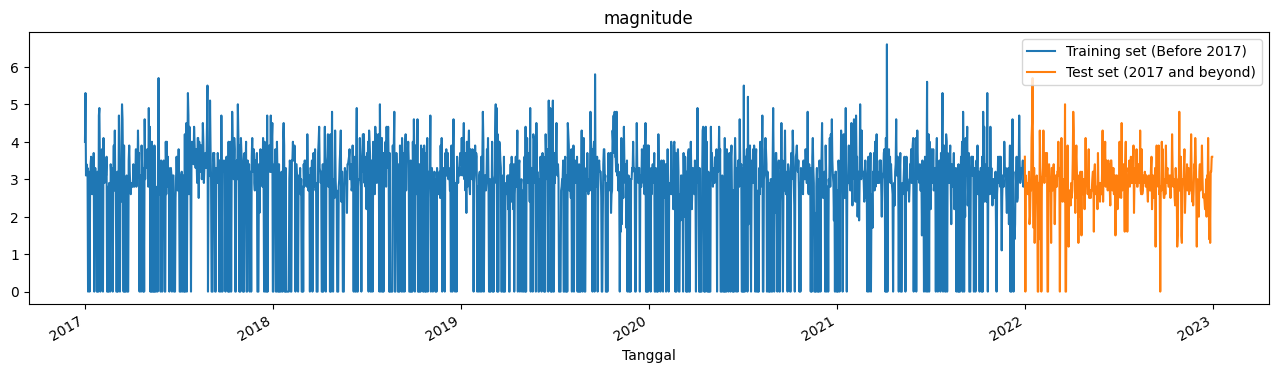

In [146]:
data["Magnitude"][:'2021'].plot(figsize=(16,4),legend=True)
data["Magnitude"]['2022':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('magnitude')
plt.show()

In [147]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [148]:
sc_single = MinMaxScaler(feature_range=(0, 1))
sc_single.fit(data_total["Magnitude"].values.reshape(-1, 1))

MinMaxScaler()

In [149]:
X_train = []
y_train = []
for i in range(60,1818):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [150]:
print(X_train)

[[0.27465303 0.27392257 0.31409788 ... 0.28634039 0.24981738 0.25493061]
 [0.27392257 0.31409788 0.24981738 ... 0.24981738 0.25493061 0.31628926]
 [0.31409788 0.24981738 0.21037253 ... 0.25493061 0.31628926 0.65668371]
 ...
 [0.3155588  0.36303871 0.26223521 ... 0.3034653  0.27976625 0.31318115]
 [0.36303871 0.26223521 0.33528123 ... 0.27976625 0.31318115 0.27149671]
 [0.26223521 0.33528123 0.28122717 ... 0.31318115 0.27149671 0.28089189]]


In [152]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [153]:
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

In [154]:
regressor.compile(optimizer='Adam',loss='mean_squared_error')

In [155]:
regressor.fit(X_train,y_train,epochs=20,batch_size=32)

Epoch 1/20


55/55 [==============================] - 9s 57ms/step - loss: 0.0473
Epoch 2/20
55/55 [==============================] - 3s 63ms/step - loss: 0.0393
Epoch 3/20
55/55 [==============================] - 4s 64ms/step - loss: 0.0381
Epoch 4/20
55/55 [==============================] - 3s 55ms/step - loss: 0.0387
Epoch 5/20
55/55 [==============================] - 3s 51ms/step - loss: 0.0380
Epoch 6/20
55/55 [==============================] - 3s 55ms/step - loss: 0.0382
Epoch 7/20
55/55 [==============================] - 3s 57ms/step - loss: 0.0376
Epoch 8/20
55/55 [==============================] - 3s 60ms/step - loss: 0.0383
Epoch 9/20
55/55 [==============================] - 3s 54ms/step - loss: 0.0374
Epoch 10/20
55/55 [==============================] - 3s 53ms/step - loss: 0.0383
Epoch 11/20
55/55 [==============================] - 3s 53ms/step - loss: 0.0380
Epoch 12/20
55/55 [==============================] - 3s 52ms/step - loss: 0.0371
Epoch 13/20
55/55 [=============================

In [157]:
data_total = pd.concat((data[["Latitude", "Longitude", "Kedalaman (km)", "Magnitude"]][:'2021'], data[["Latitude", "Longitude", "Kedalaman (km)", "Magnitude"]]['2022':]), axis=0)
inputs = data_total[len(data_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1, 4)  # Ubah menjadi (jumlah_data, 4) untuk 4 fitur yang diharapkan
inputs = sc.transform(inputs)


In [170]:
X_test = []
for i in range(60, 311):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 4))
predicted_magnitude = regressor.predict(X_test)
predicted_magnitude = np.reshape(predicted_magnitude, (predicted_magnitude.shape[0], 4))
predicted_magnitude = sc.inverse_transform(predicted_magnitude.reshape(-1, 4))


ValueError: cannot reshape array of size 15060 into shape (251,60,4)

In [ ]:
print(X_test.shape)
print(X_test.size)


(251, 60)
15060


In [ ]:
plot_predictions(test_set,predicted_magnitude)

NameError: name 'plot_predictions' is not defined